In [1]:
##Inception V3##

import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Define your dataset directories
train_dir = "/Users/k.saidarshanreddy/Downloads/CLASSIFICATION-OF-PNEUMONIA-FROM-CHEST-X-RAY-IMAGES-DURING-COVID-19-main/Datasets/dataset_for_fourway_classification/train"
val_dir = "/Users/k.saidarshanreddy/Downloads/CLASSIFICATION-OF-PNEUMONIA-FROM-CHEST-X-RAY-IMAGES-DURING-COVID-19-main/Datasets/dataset_for_fourway_classification/valid"

# Data preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=90,
    class_mode='categorical')

# Validation data preprocessing without data augmentation and a reduced batch size
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_batch_size = 32

validation_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=validation_batch_size,
    class_mode='categorical')

# Model architecture using InceptionV3
base_model = InceptionV3(include_top=False, weights='imagenet', input_shape=(150, 150, 3))

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Learning rate reduction callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# Compile the model with RMSprop optimizer and a lower learning rate
opt = tf.keras.optimizers.RMSprop(learning_rate=0.0001)  # Reduce the learning rate

METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=METRICS)

# Train the model with early stopping and learning rate reduction callbacks
r = model.fit(train_generator,
                epochs=10,
                validation_data=validation_generator,
                steps_per_epoch=len(train_generator),
                callbacks=[reduce_lr, early_stopping])

# Evaluate the model on the validation set
results = model.evaluate(validation_generator)
print("Validation Loss:", results[0])
print("Validation Accuracy:", results[1])


Found 19559 images belonging to 5 classes.
Found 922 images belonging to 5 classes.
Epoch 1/10
218/218 [==============================] - 3234s 15s/step - loss: 0.7334 - accuracy: 0.7527 - precision: 0.7823 - recall: 0.7248 - val_loss: 0.8661 - val_accuracy: 0.6377 - val_precision: 0.6437 - val_recall: 0.6269 - lr: 1.0000e-04
Epoch 2/10
218/218 [==============================] - 2641s 12s/step - loss: 0.3702 - accuracy: 0.8633 - precision: 0.8728 - recall: 0.8523 - val_loss: 0.9417 - val_accuracy: 0.5184 - val_precision: 0.5197 - val_recall: 0.5152 - lr: 1.0000e-04
Epoch 3/10
218/218 [==============================] - 3173s 15s/step - loss: 0.2692 - accuracy: 0.8966 - precision: 0.9019 - recall: 0.8907 - val_loss: 0.7372 - val_accuracy: 0.6193 - val_precision: 0.6200 - val_recall: 0.6193 - lr: 1.0000e-04
Epoch 4/10
218/218 [==============================] - 3286s 15s/step - loss: 0.2296 - accuracy: 0.9107 - precision: 0.9147 - recall: 0.9071 - val_loss: 0.9382 - val_accuracy: 0.5130 - 

In [3]:
# Access training loss and accuracy values from the training history
training_loss = r.history['loss']
training_accuracy = r.history['accuracy']

# Calculate the average training loss and accuracy
average_loss = sum(training_loss) / len(training_loss)
average_accuracy = sum(training_accuracy) / len(training_accuracy)

print("Average Training Loss:", average_loss)
print("Average Training Accuracy:", average_accuracy)


Average Training Loss: 0.2643819823861122
Average Training Accuracy: 0.9012832820415497


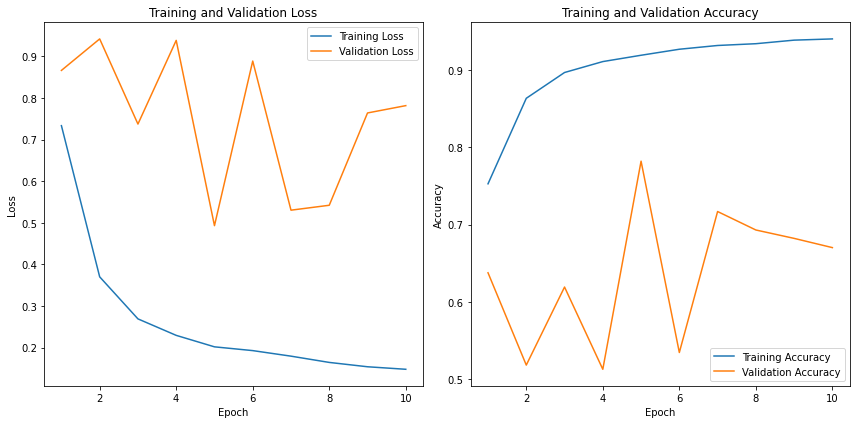

In [4]:
import matplotlib.pyplot as plt

# Access training and validation loss and accuracy values from the training history
training_loss = r.history['loss']
training_accuracy = r.history['accuracy']
val_loss = r.history['val_loss']
val_accuracy = r.history['val_accuracy']

# Plot training and validation loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(training_loss) + 1), training_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(training_accuracy) + 1), training_accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.tight_layout()
plt.show()


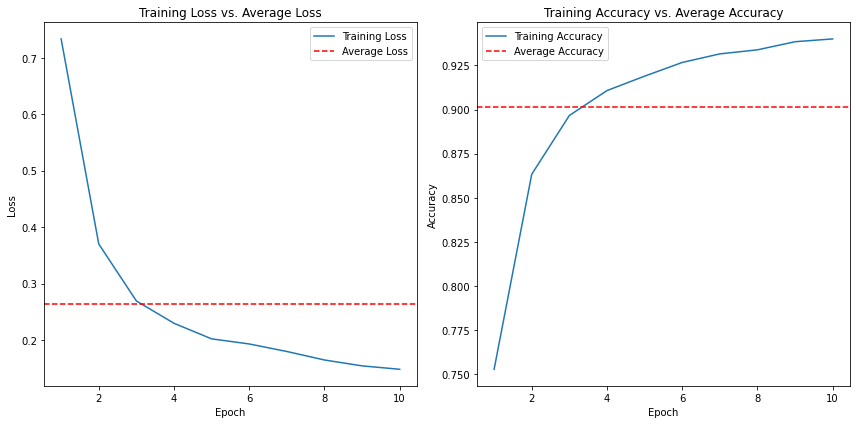

In [5]:
import matplotlib.pyplot as plt

# Access training loss and accuracy values from the training history
training_loss = r.history['loss']
training_accuracy = r.history['accuracy']

# Calculate the average training loss and accuracy
average_loss = sum(training_loss) / len(training_loss)
average_accuracy = sum(training_accuracy) / len(training_accuracy)

# Plot the average training loss and accuracy
plt.figure(figsize=(12, 6))

# Plot the average training loss
plt.subplot(1, 2, 1)
plt.plot(range(1, len(training_loss) + 1), training_loss, label='Training Loss')
plt.axhline(average_loss, color='r', linestyle='--', label='Average Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss vs. Average Loss')

# Plot the average training accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(training_accuracy) + 1), training_accuracy, label='Training Accuracy')
plt.axhline(average_accuracy, color='r', linestyle='--', label='Average Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training Accuracy vs. Average Accuracy')

plt.tight_layout()
plt.show()


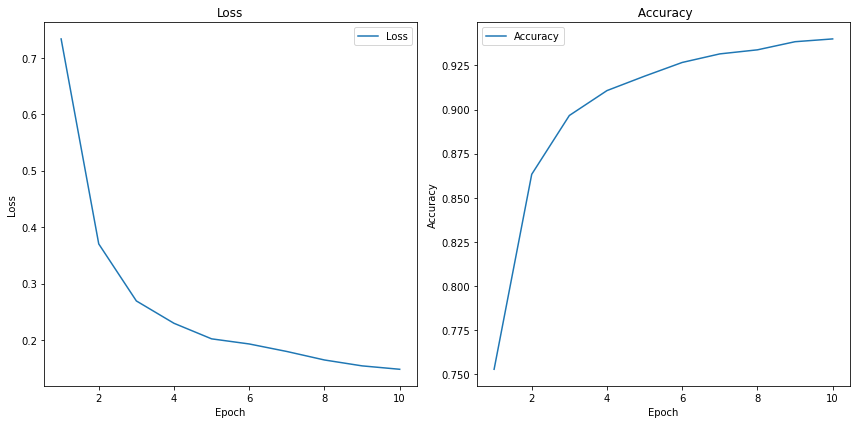

In [9]:
import matplotlib.pyplot as plt

# Access training loss and accuracy values from the training history
training_loss = r.history['loss']
training_accuracy = r.history['accuracy']

# Plot training loss and accuracy
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(training_loss) + 1), training_loss, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(range(1, len(training_accuracy) + 1), training_accuracy, label='Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title(' Accuracy')

plt.tight_layout()
plt.show()


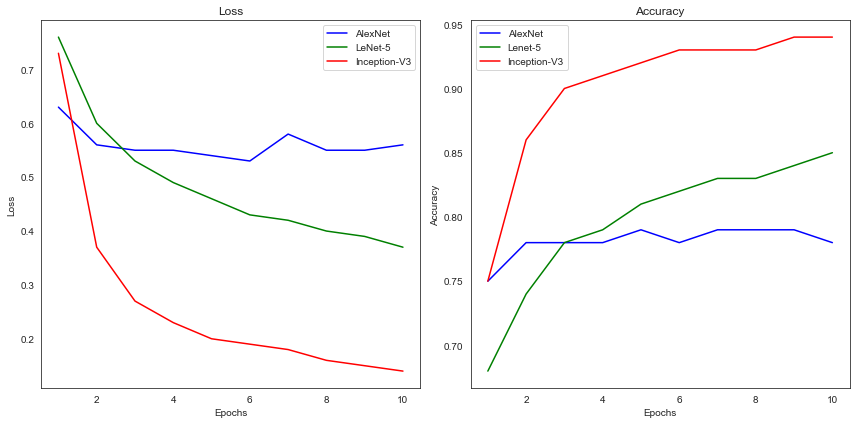

In [42]:
import matplotlib.pyplot as plt

# Define the training details for each model (e.g., training loss, validation loss, accuracy)
model1_loss = [0.63, 0.56, 0.55, 0.55, 0.54, 0.53, 0.58, 0.55, 0.55, 0.56]  # Replace with your actual data
model1_accuracy = [0.75, 0.78, 0.78, 0.78, 0.79, 0.78, 0.79, 0.79, 0.79, 0.78 ]

model2_loss = [0.76, 0.60, 0.53, 0.49, 0.46, 0.43, 0.42, 0.40, 0.39, 0.37]  # Replace with your actual data
model2_accuracy = [0.68, 0.74, 0.78, 0.79, 0.81, 0.82, 0.83, 0.83, 0.84, 0.85]

model3_loss = [0.73, 0.37, 0.27, 0.23, 0.20, 0.19, 0.18, 0.16, 0.15, 0.14]  # Replace with your actual data
model3_accuracy = [0.75, 0.86, 0.90, 0.91, 0.92, 0.93, 0.93, 0.93, 0.94, 0.94]

epochs = range(1, len(model1_loss) + 1)  # Assuming the same number of epochs for all models

# Create a single plot for comparison
fig, axes=plt.subplots(1,2,figsize=(12, 6))


axes[0].plot(epochs, model1_loss, 'b', label='AlexNet')
axes[0].plot(epochs, model2_loss, 'g', label='LeNet-5')
axes[0].plot(epochs, model3_loss, 'r', label='Inception-V3')

axes[0].set_title('Loss')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()
# axes[0].tight_layout()


axes[1].plot(epochs, model1_accuracy, 'b', label='AlexNet')
axes[1].plot(epochs, model2_accuracy, 'g', label='Lenet-5')
axes[1].plot(epochs, model3_accuracy, 'r', label='Inception-V3')

axes[1].set_title('Accuracy')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].legend()
plt.tight_layout()
plt.show()


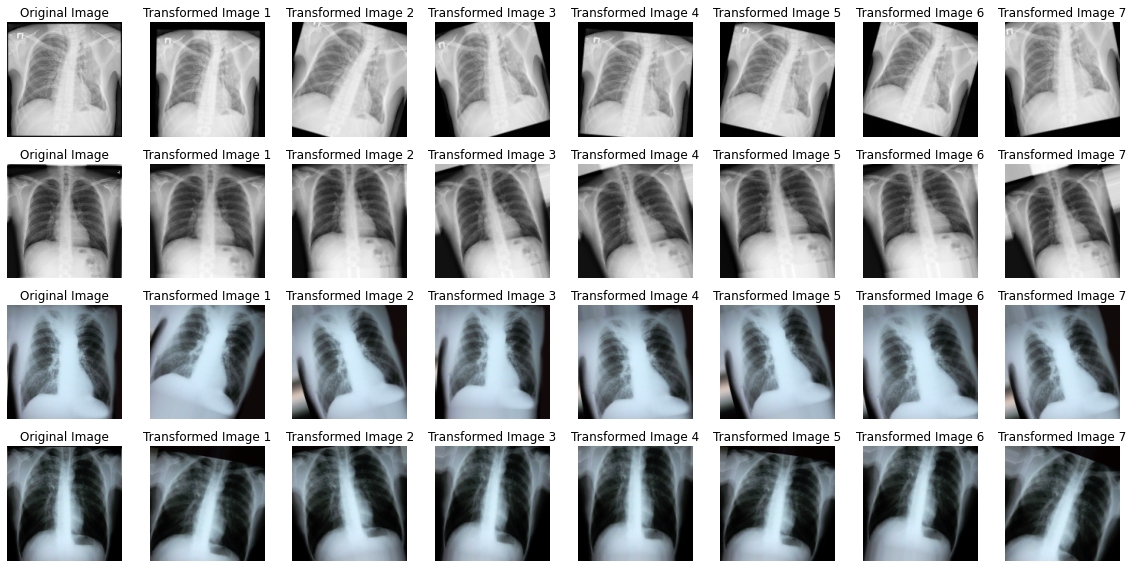

In [19]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
import random

# Define your image paths
image_paths = ["/Users/k.saidarshanreddy/Downloads/CLASSIFICATION-OF-PNEUMONIA-FROM-CHEST-X-RAY-IMAGES-DURING-COVID-19-main/Datasets/Tuberculosis-110.png",
               "/Users/k.saidarshanreddy/Downloads/CLASSIFICATION-OF-PNEUMONIA-FROM-CHEST-X-RAY-IMAGES-DURING-COVID-19-main/Datasets/Normal-10.png",
               "/Users/k.saidarshanreddy/Downloads/CLASSIFICATION-OF-PNEUMONIA-FROM-CHEST-X-RAY-IMAGES-DURING-COVID-19-main/Datasets/dataset_for_fourway_classification/valid/Tuberculosis/Tuberculosis-698.png",
               "/Users/k.saidarshanreddy/Downloads/CLASSIFICATION-OF-PNEUMONIA-FROM-CHEST-X-RAY-IMAGES-DURING-COVID-19-main/Datasets/dataset_for_fourway_classification/valid/Tuberculosis/Tuberculosis-690.png"
              ]

# Data preprocessing and augmentation
image_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    samplewise_center=True,
    samplewise_std_normalization=True
)

# Create subplots for displaying images
num_images = len(image_paths)
num_transformations = 7  # Including the original image
num_columns = num_transformations + 1  # Columns for original and transformed images
num_rows = num_images

fig, axes = plt.subplots(num_rows, num_columns, figsize=(16, 8))

for i, image_path in enumerate(image_paths):
    original_image = load_img(image_path, target_size=(150, 150))
    original_image_array = img_to_array(original_image)
    original_image_array = original_image_array.reshape((1,) + original_image_array.shape)

    axes[i, 0].imshow(array_to_img(original_image_array[0]))
    axes[i, 0].set_title('Original Image')

    for j, (transformed_image, ax) in enumerate(zip(image_generator.flow(original_image_array, batch_size=1), axes[i, 1:])):
        ax.imshow(array_to_img(transformed_image[0]))
        ax.set_title(f'Transformed Image {j+1}')
        
# Hide axes labels
for ax in axes.flatten():
    ax.axis('off')

plt.tight_layout()
plt.show()


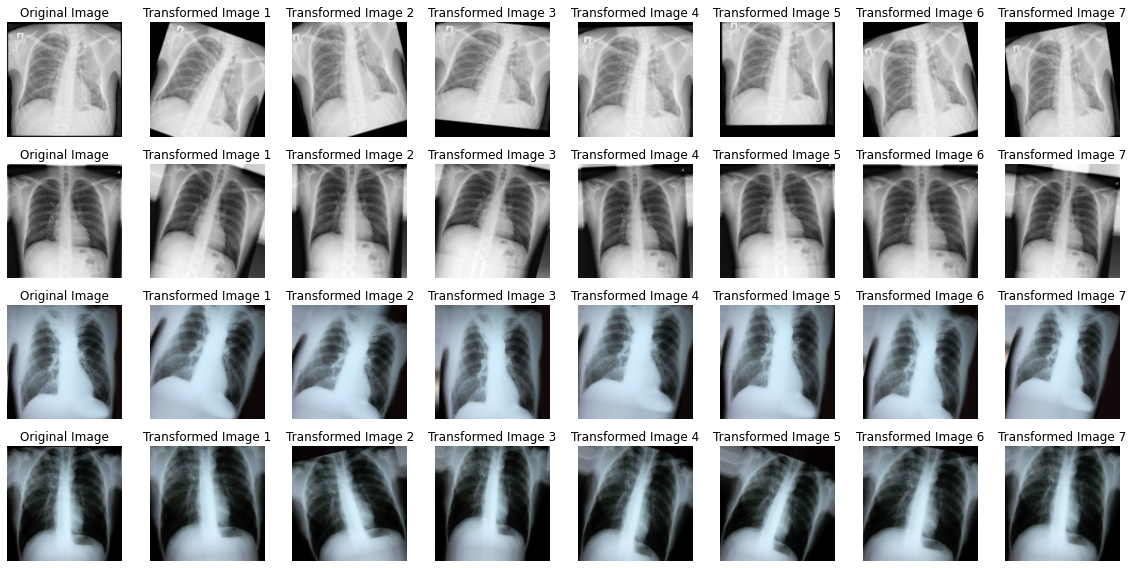

In [20]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

# Define your image paths
image_paths = ["/Users/k.saidarshanreddy/Downloads/CLASSIFICATION-OF-PNEUMONIA-FROM-CHEST-X-RAY-IMAGES-DURING-COVID-19-main/Datasets/Tuberculosis-110.png",
               "/Users/k.saidarshanreddy/Downloads/CLASSIFICATION-OF-PNEUMONIA-FROM-CHEST-X-RAY-IMAGES-DURING-COVID-19-main/Datasets/Normal-10.png",
               "/Users/k.saidarshanreddy/Downloads/CLASSIFICATION-OF-PNEUMONIA-FROM-CHEST-X-RAY-IMAGES-DURING-COVID-19-main/Datasets/dataset_for_fourway_classification/valid/Tuberculosis/Tuberculosis-698.png",
               "/Users/k.saidarshanreddy/Downloads/CLASSIFICATION-OF-PNEUMONIA-FROM-CHEST-X-RAY-IMAGES-DURING-COVID-19-main/Datasets/dataset_for_fourway_classification/valid/Tuberculosis/Tuberculosis-690.png"]

# Data preprocessing and augmentation
image_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    samplewise_center=True,
    samplewise_std_normalization=True
)

# Create subplots for displaying images
num_images = len(image_paths)
num_transformations = 7  # Including the original image
num_columns = num_transformations + 1  # Columns for original and transformed images
num_rows = num_images

fig, axes = plt.subplots(num_rows, num_columns, figsize=(16, 8))

for i, image_path in enumerate(image_paths):
    original_image = load_img(image_path, target_size=(150, 150))
    original_image_array = img_to_array(original_image)
    original_image_array = original_image_array.reshape((1,) + original_image_array.shape)

    axes[i, 0].imshow(array_to_img(original_image_array[0]))
    axes[i, 0].set_title('Original Image')

    for j, (transformed_image, ax) in enumerate(zip(image_generator.flow(original_image_array, batch_size=1), axes[i, 1:])):
        ax.imshow(array_to_img(transformed_image[0]))
        ax.set_title(f'Transformed Image {j+1}')
        
# Hide axes labels
for ax in axes.flatten():
    ax.axis('off')

plt.tight_layout()
plt.show()


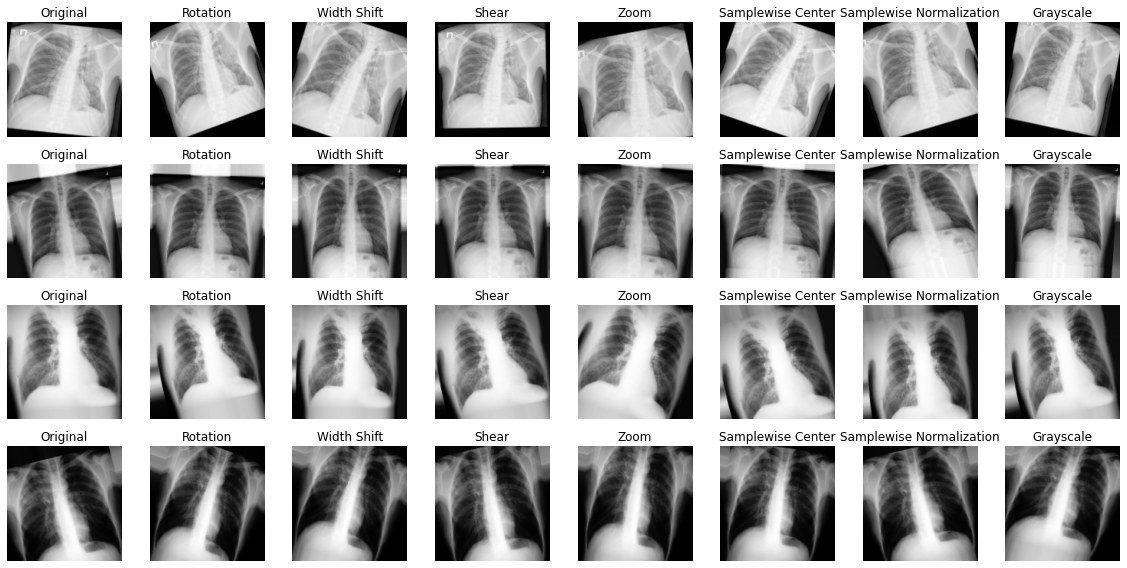

In [22]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
import random

# Define your image paths
image_paths = ["/Users/k.saidarshanreddy/Downloads/CLASSIFICATION-OF-PNEUMONIA-FROM-CHEST-X-RAY-IMAGES-DURING-COVID-19-main/Datasets/Tuberculosis-110.png",
               "/Users/k.saidarshanreddy/Downloads/CLASSIFICATION-OF-PNEUMONIA-FROM-CHEST-X-RAY-IMAGES-DURING-COVID-19-main/Datasets/Normal-10.png",
               "/Users/k.saidarshanreddy/Downloads/CLASSIFICATION-OF-PNEUMONIA-FROM-CHEST-X-RAY-IMAGES-DURING-COVID-19-main/Datasets/dataset_for_fourway_classification/valid/Tuberculosis/Tuberculosis-698.png",
               "/Users/k.saidarshanreddy/Downloads/CLASSIFICATION-OF-PNEUMONIA-FROM-CHEST-X-RAY-IMAGES-DURING-COVID-19-main/Datasets/dataset_for_fourway_classification/valid/Tuberculosis/Tuberculosis-690.png"]

# Data preprocessing and augmentation with grayscale
image_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    samplewise_center=True,
    samplewise_std_normalization=True,
    # Add grayscale transformation
    preprocessing_function=lambda x: tf.image.rgb_to_grayscale(x)
)

# Define the names of preprocessing steps
preprocessing_steps = ["Original", "Rotation", "Width Shift", "Shear", "Zoom", "Samplewise Center", "Samplewise Normalization", "Grayscale"]

# Create subplots for displaying images
num_images = len(image_paths)
num_transformations = len(preprocessing_steps)
num_columns = num_transformations  # Columns for transformed images
num_rows = num_images

fig, axes = plt.subplots(num_rows, num_columns, figsize=(16, 8))

for i, image_path in enumerate(image_paths):
    original_image = load_img(image_path, target_size=(150, 150))
    original_image_array = img_to_array(original_image)
    original_image_array = original_image_array.reshape((1,) + original_image_array.shape)

    for j, (transformed_image, ax) in enumerate(zip(image_generator.flow(original_image_array, batch_size=1), axes[i])):
        ax.imshow(array_to_img(transformed_image[0]))
        ax.set_title(preprocessing_steps[j])

# Hide axes labels
for ax in axes.flatten():
    ax.axis('off')

plt.tight_layout()
plt.show()


ValueError: could not broadcast input array from shape (150,150) into shape (150,150,3)

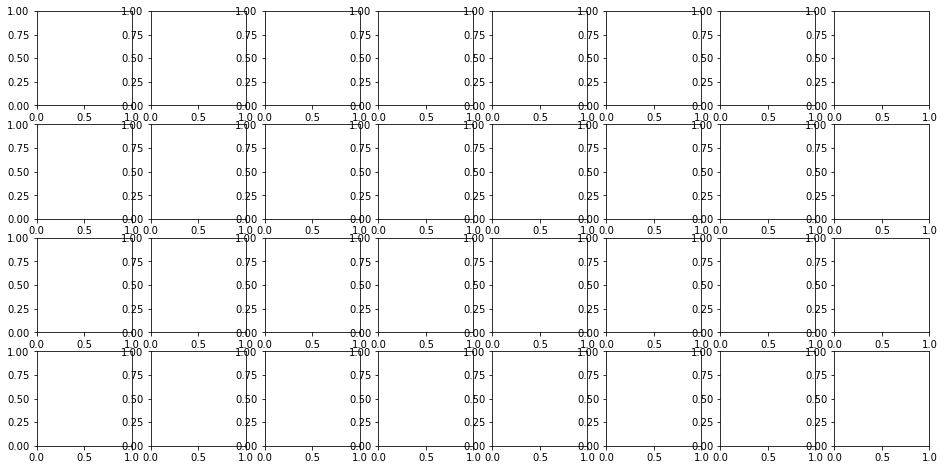

In [23]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
import random
import numpy as np

# Define your image paths
image_paths = ["/Users/k.saidarshanreddy/Downloads/CLASSIFICATION-OF-PNEUMONIA-FROM-CHEST-X-RAY-IMAGES-DURING-COVID-19-main/Datasets/Tuberculosis-110.png",
               "/Users/k.saidarshanreddy/Downloads/CLASSIFICATION-OF-PNEUMONIA-FROM-CHEST-X-RAY-IMAGES-DURING-COVID-19-main/Datasets/Normal-10.png",
               "/Users/k.saidarshanreddy/Downloads/CLASSIFICATION-OF-PNEUMONIA-FROM-CHEST-X-RAY-IMAGES-DURING-COVID-19-main/Datasets/dataset_for_fourway_classification/valid/Tuberculosis/Tuberculosis-698.png",
               "/Users/k.saidarshanreddy/Downloads/CLASSIFICATION-OF-PNEUMONIA-FROM-CHEST-X-RAY-IMAGES-DURING-COVID-19-main/Datasets/dataset_for_fourway_classification/valid/Tuberculosis/Tuberculosis-690.png"]

# Custom preprocessing function to convert to grayscale
def grayscale(x):
    return np.dot(x, [0.2989, 0.5870, 0.1140])

# Data preprocessing and augmentation with grayscale
image_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    samplewise_center=True,
    samplewise_std_normalization=True,
    preprocessing_function=grayscale
)

# Define the names of preprocessing steps
preprocessing_steps = ["Original", "Rotation", "Width Shift", "Shear", "Zoom", "Samplewise Center", "Samplewise Normalization", "Grayscale"]

# Create subplots for displaying images
num_images = len(image_paths)
num_transformations = len(preprocessing_steps)
num_columns = num_transformations  # Columns for transformed images
num_rows = num_images

fig, axes = plt.subplots(num_rows, num_columns, figsize=(16, 8))

for i, image_path in enumerate(image_paths):
    original_image = load_img(image_path, target_size=(150, 150))
    original_image_array = img_to_array(original_image)
    original_image_array = original_image_array.reshape((1,) + original_image_array.shape)

    for j, (transformed_image, ax) in enumerate(zip(image_generator.flow(original_image_array, batch_size=1), axes[i])):
        ax.imshow(array_to_img(transformed_image[0], data_format='channels_last'))
        ax.set_title(preprocessing_steps[j])

# Hide axes labels
for ax in axes.flatten():
    ax.axis('off')

plt.tight_layout()
plt.show()


ValueError: could not broadcast input array from shape (150,150) into shape (150,150,3)

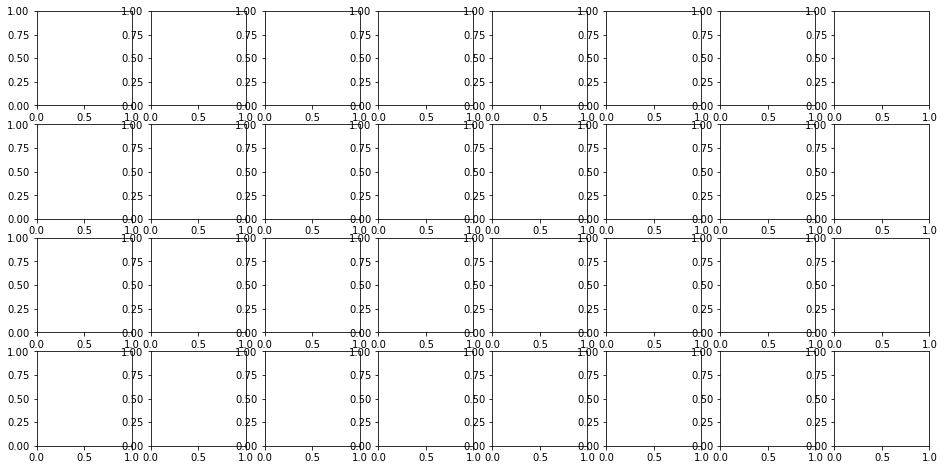

In [24]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
import random
import numpy as np

# Define your image paths
image_paths = ["/Users/k.saidarshanreddy/Downloads/CLASSIFICATION-OF-PNEUMONIA-FROM-CHEST-X-RAY-IMAGES-DURING-COVID-19-main/Datasets/Tuberculosis-110.png",
               "/Users/k.saidarshanreddy/Downloads/CLASSIFICATION-OF-PNEUMONIA-FROM-CHEST-X-RAY-IMAGES-DURING-COVID-19-main/Datasets/Normal-10.png",
               "/Users/k.saidarshanreddy/Downloads/CLASSIFICATION-OF-PNEUMONIA-FROM-CHEST-X-RAY-IMAGES-DURING-COVID-19-main/Datasets/dataset_for_fourway_classification/valid/Tuberculosis/Tuberculosis-698.png",
               "/Users/k.saidarshanreddy/Downloads/CLASSIFICATION-OF-PNEUMONIA-FROM-CHEST-X-RAY-IMAGES-DURING-COVID-19-main/Datasets/dataset_for_fourway_classification/valid/Tuberculosis/Tuberculosis-690.png"]

# Custom preprocessing function to convert to grayscale
def grayscale(x):
    return np.dot(x, [0.2989, 0.5870, 0.1140])

# Data preprocessing and augmentation with grayscale
image_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    samplewise_center=True,
    samplewise_std_normalization=True,
    preprocessing_function=grayscale
)

# Define the names of preprocessing steps
preprocessing_steps = ["Original", "Rotation", "Width Shift", "Shear", "Zoom", "Samplewise Center", "Samplewise Normalization", "Grayscale"]

# Create subplots for displaying images
num_images = len(image_paths)
num_transformations = len(preprocessing_steps)
num_columns = num_transformations  # Columns for transformed images
num_rows = num_images

fig, axes = plt.subplots(num_rows, num_columns, figsize=(16, 8))

for i, image_path in enumerate(image_paths):
    original_image = load_img(image_path, target_size=(150, 150))
    original_image_array = img_to_array(original_image)
    original_image_array = original_image_array.reshape((1,) + original_image_array.shape)

    for j, (transformed_image, ax) in enumerate(zip(image_generator.flow(original_image_array, batch_size=1), axes[i])):
        if j == 0:
            ax.imshow(array_to_img(transformed_image[0], data_format='channels_last'))
        else:
            # Convert grayscale back to 3 channels for visualization
            transformed_image_rgb = np.repeat(transformed_image[0], 3, axis=2)
            ax.imshow(array_to_img(transformed_image_rgb, data_format='channels_last'))
        ax.set_title(preprocessing_steps[j])

# Hide axes labels
for ax in axes.flatten():
    ax.axis('off')

plt.tight_layout()
plt.show()


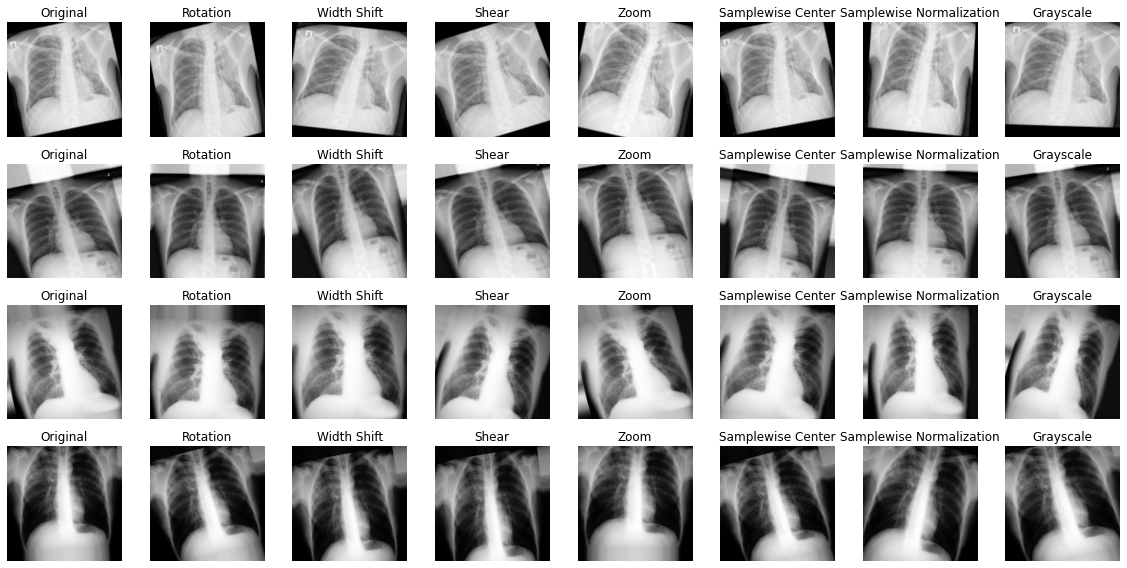

In [25]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
import random
import numpy as np

# Define your image paths
image_paths = ["/Users/k.saidarshanreddy/Downloads/CLASSIFICATION-OF-PNEUMONIA-FROM-CHEST-X-RAY-IMAGES-DURING-COVID-19-main/Datasets/Tuberculosis-110.png",
               "/Users/k.saidarshanreddy/Downloads/CLASSIFICATION-OF-PNEUMONIA-FROM-CHEST-X-RAY-IMAGES-DURING-COVID-19-main/Datasets/Normal-10.png",
               "/Users/k.saidarshanreddy/Downloads/CLASSIFICATION-OF-PNEUMONIA-FROM-CHEST-X-RAY-IMAGES-DURING-COVID-19-main/Datasets/dataset_for_fourway_classification/valid/Tuberculosis/Tuberculosis-698.png",
               "/Users/k.saidarshanreddy/Downloads/CLASSIFICATION-OF-PNEUMONIA-FROM-CHEST-X-RAY-IMAGES-DURING-COVID-19-main/Datasets/dataset_for_fourway_classification/valid/Tuberculosis/Tuberculosis-690.png"]

# Custom preprocessing function to convert to grayscale
def grayscale(x):
    x = np.dot(x, [0.2989, 0.5870, 0.1140])  # Convert to grayscale
    x = np.stack((x, x, x), axis=-1)  # Expand to 3 channels (grayscale)
    return x

# Data preprocessing and augmentation with grayscale
image_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    samplewise_center=True,
    samplewise_std_normalization=True,
    preprocessing_function=grayscale
)

# Define the names of preprocessing steps
preprocessing_steps = ["Original", "Rotation", "Width Shift", "Shear", "Zoom", "Samplewise Center", "Samplewise Normalization", "Grayscale"]

# Create subplots for displaying images
num_images = len(image_paths)
num_transformations = len(preprocessing_steps)
num_columns = num_transformations  # Columns for transformed images
num_rows = num_images

fig, axes = plt.subplots(num_rows, num_columns, figsize=(16, 8))

for i, image_path in enumerate(image_paths):
    original_image = load_img(image_path, target_size=(150, 150))
    original_image_array = img_to_array(original_image)
    original_image_array = original_image_array.reshape((1,) + original_image_array.shape)

    for j, (transformed_image, ax) in enumerate(zip(image_generator.flow(original_image_array, batch_size=1), axes[i])):
        ax.imshow(array_to_img(transformed_image[0], data_format='channels_last'))
        ax.set_title(preprocessing_steps[j])

# Hide axes labels
for ax in axes.flatten():
    ax.axis('off')

plt.tight_layout()
plt.show()


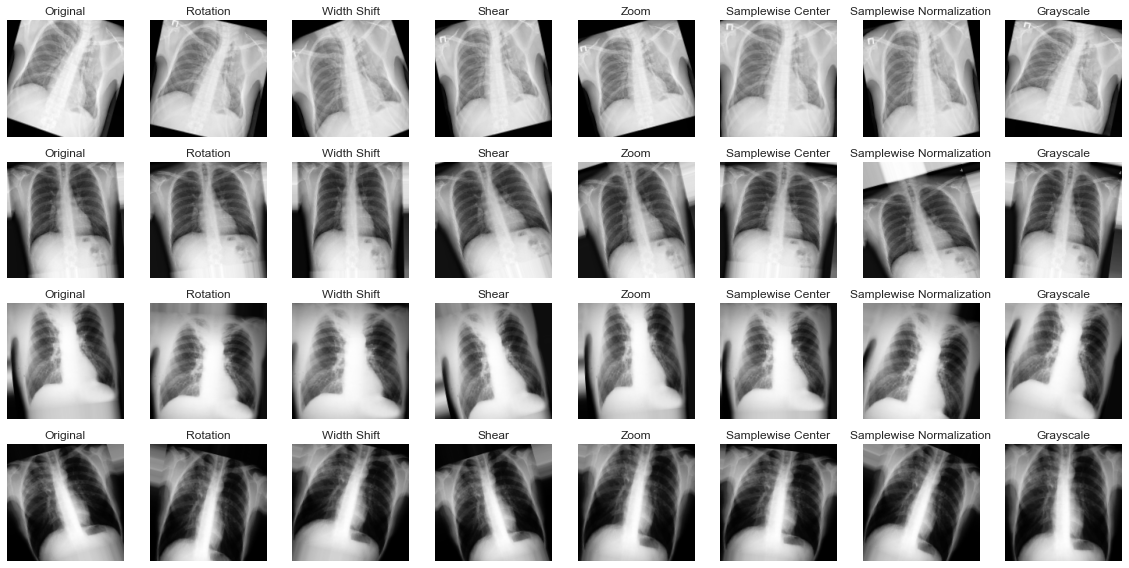

In [44]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
import random
import numpy as np

# Define your image paths
image_paths = ["/Users/k.saidarshanreddy/Downloads/CLASSIFICATION-OF-PNEUMONIA-FROM-CHEST-X-RAY-IMAGES-DURING-COVID-19-main/Datasets/Tuberculosis-110.png",
               "/Users/k.saidarshanreddy/Downloads/CLASSIFICATION-OF-PNEUMONIA-FROM-CHEST-X-RAY-IMAGES-DURING-COVID-19-main/Datasets/Normal-10.png",
               "/Users/k.saidarshanreddy/Downloads/CLASSIFICATION-OF-PNEUMONIA-FROM-CHEST-X-RAY-IMAGES-DURING-COVID-19-main/Datasets/dataset_for_fourway_classification/valid/Tuberculosis/Tuberculosis-698.png",
               "/Users/k.saidarshanreddy/Downloads/CLASSIFICATION-OF-PNEUMONIA-FROM-CHEST-X-RAY-IMAGES-DURING-COVID-19-main/Datasets/dataset_for_fourway_classification/valid/Tuberculosis/Tuberculosis-690.png"]

# Custom preprocessing function to convert to grayscale
def grayscale_and_resize(x):
    x = np.dot(x, [0.2989, 0.5870, 0.1140])  # Convert to grayscale
    x = x.reshape(150, 150, 1)  # Add a single channel for grayscale
    return x

# Data preprocessing and augmentation with grayscale
image_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    samplewise_center=True,
    samplewise_std_normalization=True,
    preprocessing_function=grayscale_and_resize
)

# Define the names of preprocessing steps
preprocessing_steps = ["Original", "Rotation", "Width Shift", "Shear", "Zoom", "Samplewise Center", "Samplewise Normalization", "Grayscale"]

# Create subplots for displaying images
num_images = len(image_paths)
num_transformations = len(preprocessing_steps)
num_columns = num_transformations  # Columns for transformed images
num_rows = num_images

fig, axes = plt.subplots(num_rows, num_columns, figsize=(16, 8))

for i, image_path in enumerate(image_paths):
    original_image = load_img(image_path, target_size=(150, 150))
    original_image_array = img_to_array(original_image)
    original_image_array = original_image_array.reshape((1,) + original_image_array.shape)

    for j, (transformed_image, ax) in enumerate(zip(image_generator.flow(original_image_array, batch_size=1), axes[i])):
        ax.imshow(array_to_img(transformed_image[0], data_format='channels_last'))
        ax.set_title(preprocessing_steps[j])

# Hide axes labels
for ax in axes.flatten():
    ax.axis('off')

plt.tight_layout()
plt.show()


In [43]:
print('hi')

hi
